# Performance of our custom CNN models

- [Performance model1 on stock photos](#sec1)
- [Performance model1 on real photos](#sec2)
- [Performance model2 on real photos](#sec3) 

In [2]:
import matplotlib.pyplot as plt
import mototaxi_utils as mutils
import numpy
import PIL
import torch
import torchvision

<a id='sec1'></a>
## Performance of model1 on stock photos

----------------------------------------
Prediction by customized CNN: mototaxi


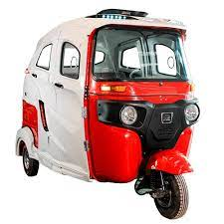

----------------------------------------
Prediction by customized CNN: no_mototaxi


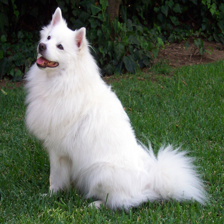

In [3]:
model_filename = "../models/01_05_24_case1_sckxcduv.pth"
idx2class = {0: 'mototaxi', 1: 'no_mototaxi'} #
base_model = torch.load(model_filename)
file_imgs = ["../figures/mototaxi1.jpg", "../figures/dog.jpg"]
for file_img in file_imgs:
    input_img = PIL.Image.open(file_img)
    input_img = input_img.resize((224, 224))
    x = torchvision.transforms.functional.to_tensor(input_img).unsqueeze_(0)
    base_model.eval()
    yhat_logits= base_model(x)
    yhat = torch.where(yhat_logits < 0.5, 0, 1) #binary labels, int64.
    print('-'*40)
    print(f'Prediction by customized CNN: {idx2class[yhat.item()]}')
    display(input_img)

<a id='sec2'></a>
## Performance of model1 on real photos

For an unbiased assessment of **model1** on real photos, we randomly draw images from a new source: `test_dataset`. The model has not seen images from that dataset before.

We find that **model1** correctly classifies **14** out of 16 images, as shown below. This is already a good result, considering the computationally light nature of both the model and the training process.


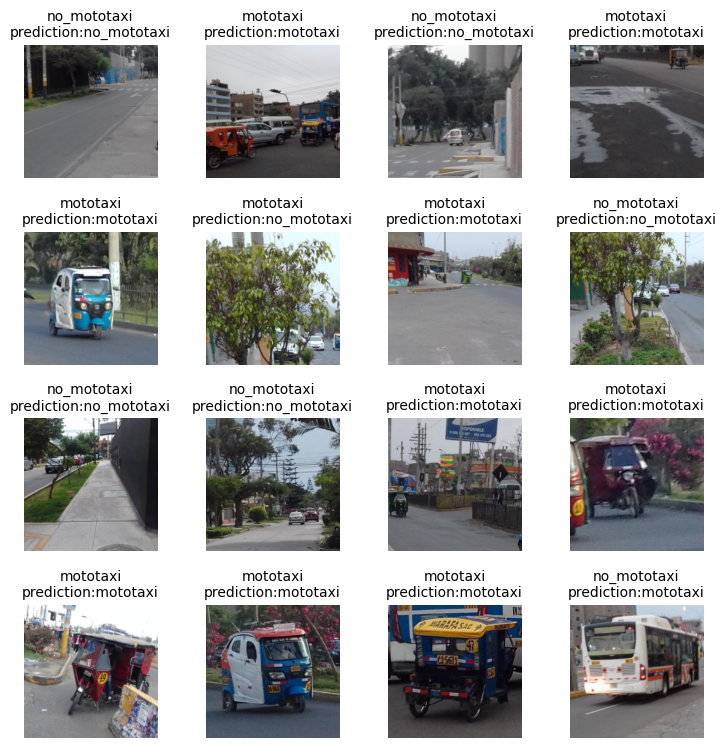

In [16]:
imagenet_mean = [0.485, 0.456, 0.405]
imagenet_std = [0.229, 0.224, 0.225]   
img_transforms = {
    'train': torchvision.transforms.Compose([
        torchvision.transforms.Resize(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(imagenet_mean, imagenet_std)
    ])
}
seed = 41
img_dir = '~/Downloads/dldata/mototaxi_training_images'
img_dataset = torchvision.datasets.ImageFolder(root=img_dir, transform=img_transforms["train"])
train_dataset, val_dataset, test_dataset = mutils.custom_random_split(img_dataset,
                                                                      (0.7, 0.2, 0.1),
                                                                      generator=torch.Generator().manual_seed(seed)
                                                                      )

num_samples_per_epoch = 25 
batch_size = 16
num_epochs = 4 
num_workers = 0
test_random_sampler = torch.utils.data.RandomSampler(data_source=test_dataset,
                                                     replacement=False,
                                                     num_samples=num_samples_per_epoch,
                                                     generator=torch.Generator().manual_seed(seed)
                                                     )

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers,
                                          sampler=test_random_sampler,
                                          generator=torch.Generator().manual_seed(seed)
                                          )

#------------------------------------------------------------
model_filename = "../models/01_05_24_case1_sckxcduv.pth"

trained_model_1 = torch.load(model_filename).eval()

minibatch_data = next(iter(test_loader)) #input is (batch_size, 3, 224, 224)
inputs_and_y, data_indices = minibatch_data
inputs, y = inputs_and_y

yhats = []
for input_img in inputs: # input_img = Tensor(3, 224, 224)
    with torch.set_grad_enabled(False):
        x = input_img.unsqueeze_(0)  # x = Tensor(1, 3, 224, 224)
        yhat_logits = trained_model_1(x)
        yhat = torch.where(yhat_logits < 0.5, 0, 1) #binary labels, int64.
        #print(yhat_logits, yhat)
        yhats.append(yhat.item())

num_images = inputs.size()[0]
fig, axs = plt.subplots(4, 4, figsize=(9, 9))
fig.subplots_adjust(hspace=0.4)
import matplotlib.pyplot as plt
for i, ax in enumerate(axs.flat):
    plt.axes(ax)
    ax.axis('off')
    title = '{0:s}\nprediction:{1:s}'.format(idx2class[y[i].item()],idx2class[yhats[i]])
    ax.set_title(title, fontsize=10)
    inp = inputs.data[i].numpy().transpose((1, 2, 0))
    x = imagenet_std * inp + imagenet_mean
    x = numpy.clip(x, 0, 1)
    ax.imshow(x)
    

<a id='sec3'></a>
## Performance of model2 on real photos

We find that **model2** correctly classifies all the **16** images used above, which is an improved from model1.


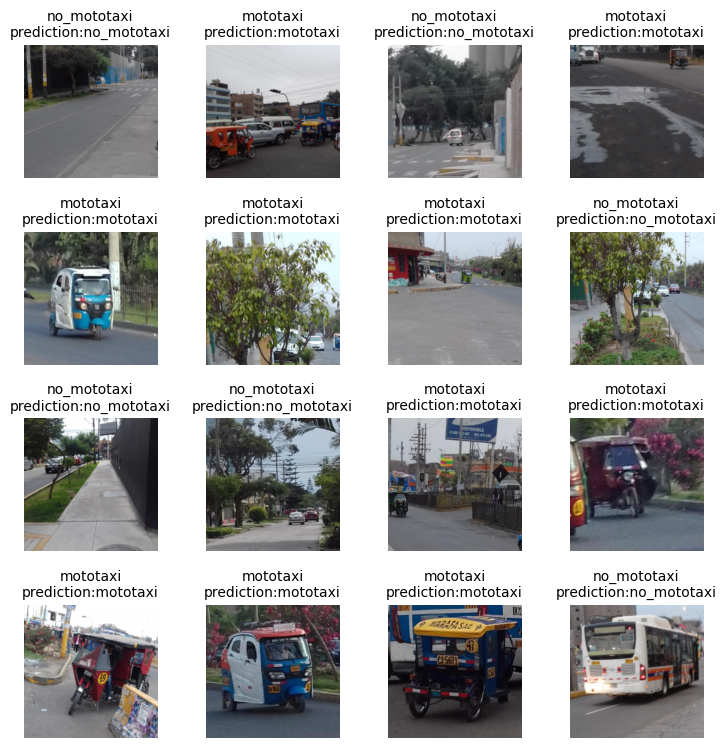

In [19]:
imagenet_mean = [0.485, 0.456, 0.405]
imagenet_std = [0.229, 0.224, 0.225]   
img_transforms = {
    'train': torchvision.transforms.Compose([
        torchvision.transforms.Resize(224),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(imagenet_mean, imagenet_std)
    ])
}
seed = 41
img_dir = '~/Downloads/dldata/mototaxi_training_images'
img_dataset = torchvision.datasets.ImageFolder(root=img_dir, transform=img_transforms["train"])
train_dataset, val_dataset, test_dataset = mutils.custom_random_split(img_dataset,
                                                                      (0.7, 0.2, 0.1),
                                                                      generator=torch.Generator().manual_seed(seed)
                                                                      )

num_samples_per_epoch = 25 
batch_size = 16
num_epochs = 4 
num_workers = 0
test_random_sampler = torch.utils.data.RandomSampler(data_source=test_dataset,
                                                     replacement=False,
                                                     num_samples=num_samples_per_epoch,
                                                     generator=torch.Generator().manual_seed(seed)
                                                     )

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False,
                                          num_workers=num_workers,
                                          sampler=test_random_sampler,
                                          generator=torch.Generator().manual_seed(seed)
                                          )

#------------------------------------------------------------
model_filename = "../models/01_05_24_case2_xdawhmcc.pth"
trained_model_1 = torch.load(model_filename).eval()

minibatch_data = next(iter(test_loader)) #input is (batch_size, 3, 224, 224)
inputs_and_y, data_indices = minibatch_data
inputs, y = inputs_and_y

yhats = []
for input_img in inputs: # input_img = Tensor(3, 224, 224)
    with torch.set_grad_enabled(False):
        x = input_img.unsqueeze_(0)  # x = Tensor(1, 3, 224, 224)
        yhat_logits = trained_model_1(x)
        yhat = torch.where(yhat_logits < 0.5, 0, 1) #binary labels, int64.
        #print(yhat_logits, yhat)
        yhats.append(yhat.item())

num_images = inputs.size()[0]
fig, axs = plt.subplots(4, 4, figsize=(9, 9))
fig.subplots_adjust(hspace=0.4)
import matplotlib.pyplot as plt
for i, ax in enumerate(axs.flat):
    plt.axes(ax)
    ax.axis('off')
    title = '{0:s}\nprediction:{1:s}'.format(idx2class[y[i].item()],idx2class[yhats[i]])
    ax.set_title(title, fontsize=10)
    inp = inputs.data[i].numpy().transpose((1, 2, 0))
    x = imagenet_std * inp + imagenet_mean
    x = numpy.clip(x, 0, 1)
    ax.imshow(x)